In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from prepare import prepare
import numpy as np
import seaborn as sns

# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('final_15.csv')

In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df.head()

,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,...,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,airdragon_team200,riftherald_team200,waterdragon_team200,inhibs_lost_team100
0,0.0,3.0,4.0,0.0,4.0,1.0,4.0,1.0,2.0,1.0,...,4414.0,3916.0,5756.0,4961.0,5855.0,4805.0,NaN,NaN,NaN,NaN
1,0.0,2.0,4.0,2.0,4.0,6.0,4.0,0.0,4.0,2.0,...,5185.0,4658.0,5595.0,5793.0,7292.0,6284.0,1.0,NaN,NaN,NaN
2,0.0,2.0,3.0,2.0,5.0,9.0,7.0,3.0,4.0,6.0,...,5571.0,5207.0,7538.0,5342.0,7855.0,5724.0,NaN,NaN,NaN,NaN
3,0.0,1.0,6.0,0.0,3.0,1.0,3.0,1.0,1.0,1.0,...,4845.0,4105.0,7897.0,8017.0,6555.0,5482.0,NaN,NaN,NaN,NaN
4,1.0,1.0,4.0,0.0,2.0,1.0,2.0,1.0,4.0,3.0,...,4698.0,3948.0,7891.0,6276.0,6514.0,4919.0,NaN,1.0,1.0,NaN


In [9]:
df.reset_index(inplace = True)

In [10]:
train, test = prepare(df)

## Original Hypothesis

    The biggest driver for predicting win rates will be the data on 'TeamWards'.

# Question # 1

    Is the average winning TeamWards different from the average TeamWards for the defeated team?

### Setting up seperate dataframes for blue_wins and red_wins

In [19]:
# Blue Winning Team DF
blue_win = train[train['winningTeam'] == 100]

In [103]:
# checking number of values in each
len(blue_win)

1498

### Checking TeamWards Mean

In [104]:
# When blue won, what was blues avg ward score?
blue_mean = blue_win.BlueTeamWards.mean()
blue_mean

40.43391188251001

In [105]:
# When blue won, what was reds avg ward score?
red_mean = blue_win.RedTeamWards.mean()
red_mean

40.4392523364486

### Graph

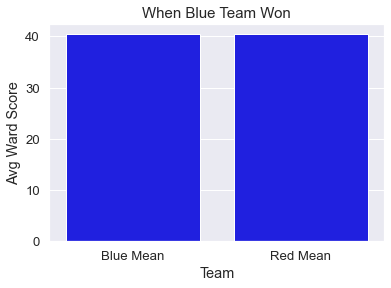

In [51]:
# Graphing the average altitude by ratings
x = ['Blue Mean', 'Red Mean']
y = [blue_mean, red_mean]
ax = sns.barplot(x, y, color='blue')

ax.set_title('When Blue Team Won', fontsize = 15)
sns.set(font_scale = 1.3)
ax.set(xlabel='Team', ylabel='Avg Ward Score')
plt.show()

### Question 1 Takeaway

    - When Blue Team won avg ward scores were pretty even.
    - I don't believe this feature will be useful in our model.  I will still try to feed TeamWards into my model and I will document the results.  I dont anticipate it to perform well.
    - I will not be running a Hypothesis Test since I dont believe TeamWards will be a driver of predicting win rates

# Question # 2

    There is difference in BlueTeamTowersLost from RedTeamTowersLost

### Checking Towers Lost Mean

In [109]:
# What is blues team towers lost mean?
blue_mean = blue_win.towers_lost_team100.mean()
blue_mean

0.6435246995994659

In [110]:
# What is reds team towers lost mean?
red_mean = blue_win.towers_lost_team200.mean()
red_mean

1.0173564753004005

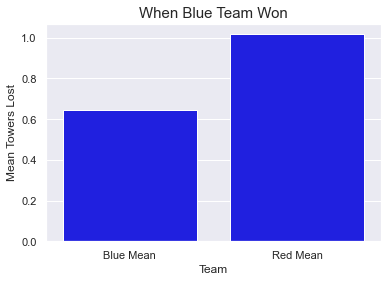

In [111]:
# Graphing the average towers lost when red won
x = ['Blue Mean', 'Red Mean']
y = [blue_mean, red_mean]
ax = sns.barplot(x, y, color='blue')

ax.set_title('When Blue Team Won', fontsize = 15)
sns.set(font_scale = 1.3)
ax.set(xlabel='Team', ylabel='Mean Towers Lost')
plt.show()

### Question 1 at a glance

    - Red Team loses more towers on avg than blue team

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [96]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    Yes, I seperated Avg Towers by red and blue team. 

### Normally Distributed?
    No, Take a Look at the graphs below.

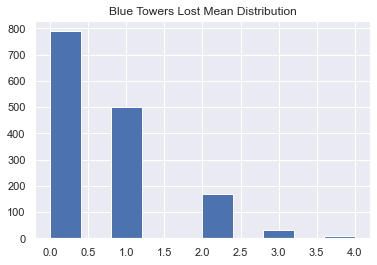

In [113]:
# Graphing Blue Towers Lost mean distribution
sns.set(font_scale = 1)
blue_win.towers_lost_team100.hist()
plt.title('Blue Towers Lost Mean Distribution')
plt.show()

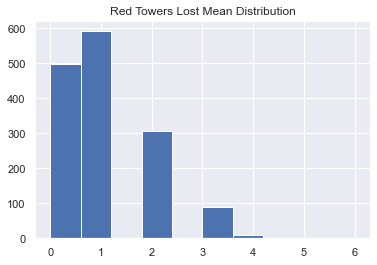

In [114]:
# Graphing Red Towers Lost mean distribution
blue_win.towers_lost_team200.hist()
plt.title('Red Towers Lost Mean Distribution')
plt.show()

### Equal Variances?
    - The leven test concluded the populations DID have equal variances.

In [115]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(blue_win.towers_lost_team100, blue_win.towers_lost_team200)
stats, p

(2.283234251394721, 0.13088443402191)

## A small p-value suggests that the populations do not have equal variances.

In [117]:
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

populations do have equal variances


### Mann-Whitney's Test
    Assumptions were not met.  I will use a Non-Parametric Test.

### Hypothesis

### $H_0$: There is no difference in BlueTeamTowersLost from RedTeamTowersLost.
### $H_a$: There is difference in BlueTeamTowersLost from RedTeamTowersLost

In [119]:
# From stats library using the mannwhitneyu, returning a stats and p value
stat, p = mannwhitneyu(blue_win.towers_lost_team100, blue_win.towers_lost_team200)
stat, p

if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject Null Hypothesis


### Hypotheis Results
    - There IS a difference in BlueTeamTowersLost from RedTeamTowersLost

### Question 1 Takeway
    - I have a 95% confidence level that there is a difference in BlueTeamTowersLost from RedTeamTowersLost  
    - When Blue Team wins, RedTeamsTowerLost is more than Blue
    - towers_lost_team100 seems to be a good fit or useful for modeling.  I will include it in my models and see if this is true. 

In [121]:
blue_win.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 235 to 3582
Data columns (total 231 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    index                                  int64  
 1    airdragon_team100                      float64
 2    assistsplayer_1                        float64
 3    assistsplayer_10                       float64
 4    assistsplayer_2                        float64
 5    assistsplayer_3                        float64
 6    assistsplayer_4                        float64
 7    assistsplayer_5                        float64
 8    assistsplayer_6                        float64
 9    assistsplayer_7                        float64
 10   assistsplayer_8                        float64
 11   assistsplayer_9                        float64
 12   baron_team100                          float64
 13   chemtechdragon_team100                 float64
 14   chemtechdragon_team200              

# Gold Per Sec

In [132]:
blue_mean = blue_win.BlueTeamGoldPerSec.mean()
red_mean = blue_win.RedTeamGoldPerSec.mean()

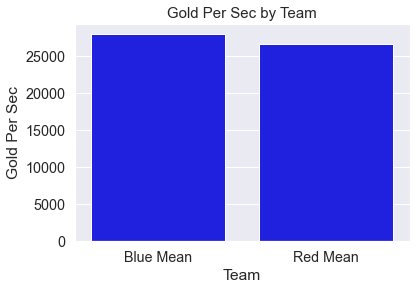

In [140]:
# Graphing the average towers lost when red won
x = ['Blue Mean', 'Red Mean']
y = [blue_mean, red_mean]
ax = sns.barplot(x, y, color='blue')

ax.set_title('Gold Per Sec by Team', fontsize = 15)
sns.set(font_scale = 1.3)
ax.set(xlabel='Team', ylabel='Gold Per Sec')
plt.show()

# Total Gold

In [141]:
blue_mean = blue_win.BlueTeamTotalGold.mean()
red_mean = blue_win.RedTeamTotalGold.mean()

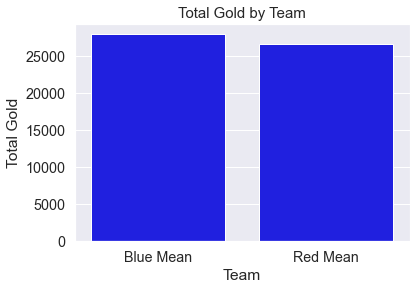

In [142]:
# Graphing the average towers lost when red won
x = ['Blue Mean', 'Red Mean']
y = [blue_mean, red_mean]
ax = sns.barplot(x, y, color='blue')

ax.set_title('Total Gold by Team', fontsize = 15)
sns.set(font_scale = 1.3)
ax.set(xlabel='Team', ylabel='Total Gold')
plt.show()

# Gold Difference

In [144]:
blue_win.BlueTeamTotalGoldDifference.median()

1406.5

In [145]:
blue_win.BlueTeamTotalGoldDifference.mean()

1356.1688918558077

# Game Duration

In [156]:
round(train.gameDuration.mean(), 1), round(train.gameDuration.mean()/2,1)

(1901.0, 950.5)

In [154]:
train.gameDuration.median(), train.gameDuration.median()/2

(1854.0, 927.0)